<h1>Tunnuslukuja</h1>

Määrällisille muuttujille lasketaan tyypillisesti keskiarvo, keskihajonta ja viiden luvun yhteenveto.

Määrällisten muuttujien välisiä riippuvuuksia mitataan korrelaatiokertoimilla.

Muistettavat funktiot <b>describe(), pivot_table(), boxplot(), corr(), plot.scatter()</b>

In [1]:
#Tuon tarvittavat kirjastot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Avaan Excel-datan dataframeen ja näytän viisi ensimmäistä riviä
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
#Määritän muutamia listoja, joita tarvitsen jatkossa
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']

<h2>describe() laskee tunnusluvut</h2>

In [4]:
#Tunnuslukuja kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka', 'johto', 'työtov', 'työymp', 
    'palkkat', 'työteht']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka,johto,työtov,työymp,palkkat,työteht
count,82.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,37.95,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,9.77,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,20.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,31.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,37.50,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,44.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,61.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


<h2>pivot_table() on monipuolinen raportointityökalu</h2>

In [5]:
#pivot_table tuottaa oletuksena keskiarvoja
df1 = df.pivot_table(values = 'palkka', index = ['sukup', 'perhe'], columns = 'koulutus')

#Palkkakeskiarvot ilman desimaaleja
df1.style.format('{:.0f}')

In [6]:
#Hierarkisen indeksin arvot aiemmin määritellyistä sukup- ja perhe-listoista
df1.index = df1.index.set_levels(sukup, level=0)
df1.index = df1.index.set_levels(perhe, level=1)

#Sarakeotsikot aiemmin määritellystä koulutus-listasta
df1.columns = koulutus

#Tulokset ilman desimaaleja
df1.style.format('{:.0f}')

In [7]:
#Pivot-taulukossa voi käyttää monenlaisia funktioita
df2 = df.pivot_table(values = 'palkka', index = 'koulutus', 
                     aggfunc = [np.min, np.median, np.mean, np.max])

df2.index = koulutus

df2.columns = ['pienin', 'mediaani', 'keskiarvo', 'suurin']

df2.style.format('{:.0f}')

,pienin,mediaani,keskiarvo,suurin
Peruskoulu,1638,2144,2310,3587
2. aste,1521,2378,2403,3510
Korkeakoulu,1559,2710,2887,6278
Ylempi korkeakoulu,5069,5147,5147,5225


<h2>boxplot() havainnollistaa viiden luvun yhteenvedon</h2>

[Text(0, 0, 'Peruskoulu'),
 Text(0, 0, '2. aste'),
 Text(0, 0, 'Korkeakoulu'),
 Text(0, 0, 'Ylempi korkeakoulu')]

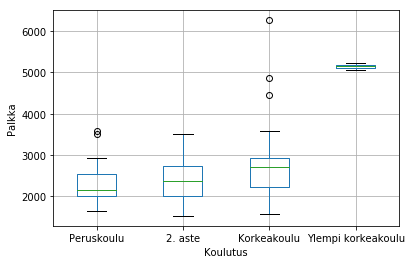

In [8]:
#boxplot (ruutu- ja janakaavio) on kätevä jakaumien vertailussa
ax = df.boxplot('palkka', by = 'koulutus')

#boxplot tuottaa otsikoita, jotka poistan
ax.set_title('')
ax.get_figure().suptitle('')

#Akselien otsikot
ax.set_xlabel('Koulutus')
ax.set_ylabel('Palkka')

#x-akselin arvoiksi koulutus-listan arvot:
ax.set_xticklabels(koulutus)

<h2>Riippuvuuksien tarkastelu</h2>

<b>corr()</b>-funktio laskee korrelaatiot ja <b>plot.scatter()</b> havainnollistaa riippuvuutta.

In [9]:
#Korrelaatiokertoimia kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka']].corr().style.format('{:.2f}')

,ikä,palveluv,palkka
ikä,1.00,0.53,0.30
palveluv,0.53,1.00,0.24
palkka,0.30,0.24,1.00


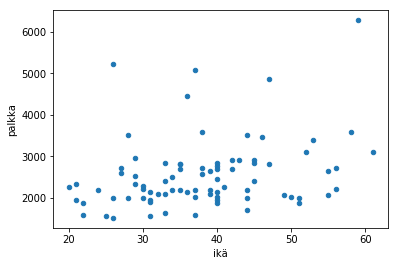

In [10]:
#Iän ja palkan riippuvuus hajontakaaviona
df.plot.scatter('ikä', 'palkka')